In [15]:
%load_ext autoreload
%autoreload 2

import pathlib
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(str(pathlib.Path().resolve().parent / "src"))
import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [75]:
raw_thyroid_df = pd.read_csv(constants.THRYOID_CANCER_DATA_PATH)
raw_thyroid_df.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'}, inplace=True)
raw_thyroid_df.columns = [c.lower().strip().replace(" ", "_") for c in raw_thyroid_df.columns]
raw_thyroid_df.head(3)

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [66]:
for feature in raw_thyroid_df:
    unique_features = np.sort(raw_thyroid_df[feature].unique())
    print(f"{feature} ({len(unique_features)}):\n\t{unique_features}\n")

age (65):
	[15 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 75 76 78 79 80 81 82]

gender (2):
	['F' 'M']

smoking (2):
	['No' 'Yes']

hx_smoking (2):
	['No' 'Yes']

hx_radiotherapy (2):
	['No' 'Yes']

thyroid_function (5):
	['Clinical Hyperthyroidism' 'Clinical Hypothyroidism' 'Euthyroid'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

physical_examination (5):
	['Diffuse goiter' 'Multinodular goiter' 'Normal'
 'Single nodular goiter-left' 'Single nodular goiter-right']

adenopathy (6):
	['Bilateral' 'Extensive' 'Left' 'No' 'Posterior' 'Right']

pathology (4):
	['Follicular' 'Hurthel cell' 'Micropapillary' 'Papillary']

focality (2):
	['Multi-Focal' 'Uni-Focal']

risk (3):
	['High' 'Intermediate' 'Low']

t (7):
	['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']

n (3):
	['N0' 'N1a' 'N1b']

m (2):
	['M0' 'M1']

stage (5):
	['I' 'II' 'III' 'IVA' 'IVB']



### Mapping Features

In [79]:
def df_map_features(df, feature_maps):
    """ """
    new_df = df.copy(deep=True)  
    for feature, feature_map in feature_maps.items():
        new_df[feature] = new_df[feature].apply(feature_map.get)
    return new_df

In [82]:
feature_maps = {
    "gender": {"F": 1, "M": 0},
    "focality": {'Multi-Focal': 1, 'Uni-Focal': 0},
}
yes_no_features = ["smoking", "hx_smoking", "hx_radiotherapy", "recurred"]
yes_no_map = {"Yes": 1, "No": 0}

feature_maps.update({feature: yes_no_map for feature in yes_no_features})
feature_maps

{'gender': {'F': 1, 'M': 0},
 'focality': {'Multi-Focal': 1, 'Uni-Focal': 0},
 'smoking': {'Yes': 1, 'No': 0},
 'hx_smoking': {'Yes': 1, 'No': 0},
 'hx_radiotherapy': {'Yes': 1, 'No': 0},
 'recurred': {'Yes': 1, 'No': 0}}

In [84]:
thryoid_df = df_map_features(raw_thyroid_df, feature_maps)

In [85]:
thryoid_df

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurred
0,27,1,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,0,Low,T1a,N0,M0,I,Indeterminate,0
1,34,1,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
2,30,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
3,62,1,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0
4,62,1,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,0,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1
379,81,0,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,1,High,T4b,N1b,M1,IVB,Structural Incomplete,1
380,72,0,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,1,High,T4b,N1b,M1,IVB,Structural Incomplete,1
381,61,0,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,1,High,T4b,N1b,M0,IVA,Structural Incomplete,1


# Paper Plots 
    [] Gender x age plot
    [] Risk by pathology plot
    [] Stage x age plot
    [] Reccurence x age plot

[Text(0.5, 1.0, 'Age Distributions by Age')]

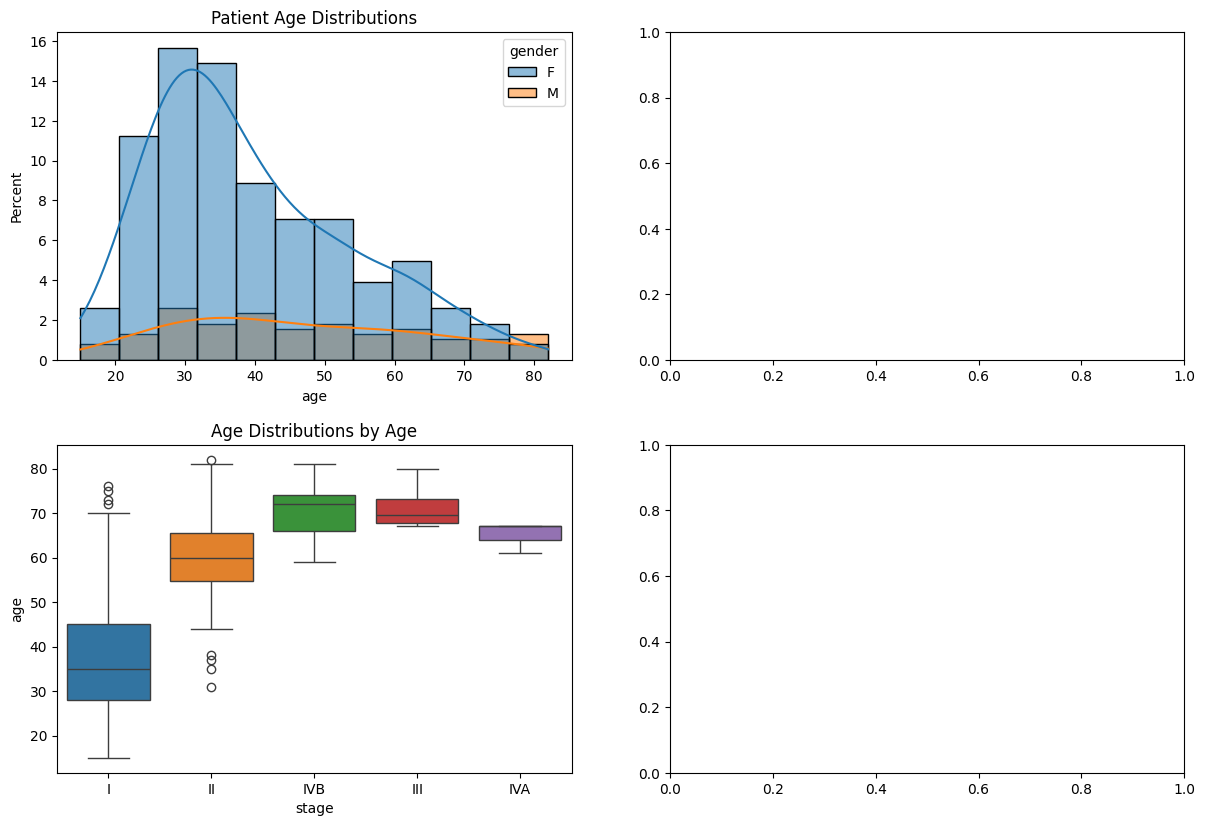

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(h_pad=4, w_pad=4)
sns.histplot(data=raw_thyroid_df, x="age", hue="gender", kde=True, stat="percent", ax=axes[0, 0])
axes[0, 0].set(title="Patient Age Distributions")

sns.boxplot(data=raw_thyroid_df, x="stage", y="age", hue="stage", ax=axes[1, 0])
axes[1, 0].set(title="Age Distributions by Age")